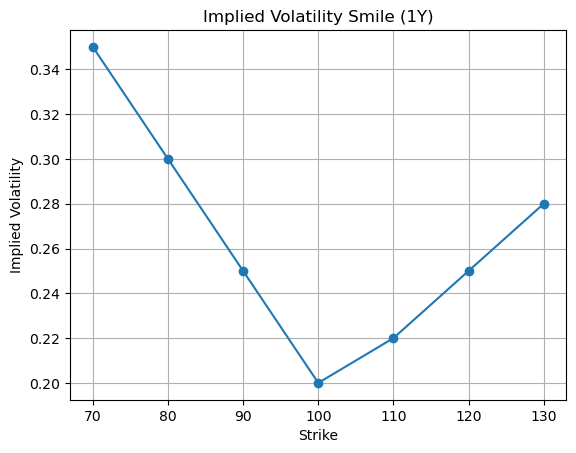

En equity, la volatilité est plus élevée pour les strike bas


In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Projet 1: Montrer visuellement le smile de volatilité en equity

# Market parameters
S0 = 100
T = 1.0
r = 0.02

# Strikes
strikes = np.array([70, 80, 90, 100, 110, 120, 130])

# Implied vol smile (equity-like skew)
implied_vols = np.array([0.35, 0.30, 0.25, 0.20, 0.22, 0.25, 0.28])

# Graphique
plt.plot(strikes, implied_vols, marker='o')
plt.xlabel("Strike")
plt.ylabel("Implied Volatility")
plt.title("Implied Volatility Smile (1Y)")
plt.grid(True)
plt.show()

print('En equity, la volatilité est plus élevée pour les strike bas')


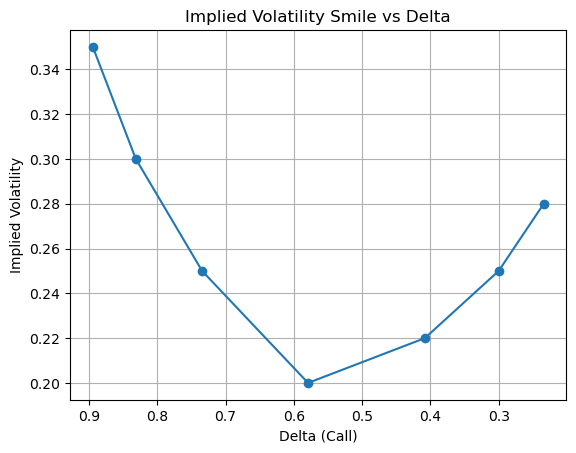

Les deltas: [0.89457182 0.83159278 0.73448749 0.57925971 0.40814513 0.30003974
 0.2340461 ]


In [85]:
# Volatilité implicite par rapport au delta:

def bs_delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

deltas = np.array([
    bs_delta_call(S0, K, T, r, vol)
    for K, vol in zip(strikes, implied_vols)
])

plt.plot(deltas, implied_vols, marker='o')
plt.xlabel("Delta (Call)")
plt.ylabel("Implied Volatility")
plt.title("Implied Volatility Smile vs Delta")
plt.gca().invert_xaxis() # on inverse l'ordre car delta élevé= strike bas
plt.grid(True)
plt.show()

print('Les deltas:' , deltas)


In [86]:
# Projet 2: Black-Scholes vs smile
# a) Comparer le prix d'un call avec une vol constante vs smile de vol
# b) Comparer le delta d'un call avec une vol constante vs smile de vol

# a) Comparer le prix d'un call avec une vol constante vs smile de vol

# Formule d'un call européen via Black-Scholes
def bs_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Avoir la vol implicite selon nos données par un processus d'interpolation:
def smile_vol(K):
    return np.interp(K, strikes, implied_vols)

# Créons les listes pour avoir nos abscisses/ordonnées 
K_grid = np.linspace(70, 130, 50)
bs_prices = []
smile_prices = []

# Prendre une vol implicite constante:
atm_vol = implied_vols[strikes == 100][0] # Renvoie la vol correspondant à la position du strikes==100, ici elle vaut 0.2
print(f"atm_vol: {atm_vol}")

for K in K_grid:
    bs_prices.append(bs_call_price(S0, K, T, r, atm_vol)) # Prend une vol constante
    smile_prices.append(bs_call_price(S0, K, T, r, smile_vol(K))) # Prend en compte le smile de vol


atm_vol: 0.2


In [83]:
# Graphique:

plt.plot(K_grid, bs_prices, color='red',label="Black-Scholes (Flat Vol)")
plt.plot(K_grid, smile_prices, color='blue',label="Smile-based Pricing")
plt.xlabel("Strike")
plt.ylabel("Call Price")
plt.title("Call Pricing: BS vs Volatility Smile")
plt.legend()
plt.grid(True)
plt.show()

print('Les prix des call sont légèrement plus élevés lorsque l'on prend en compte le smile de volatilité')


SyntaxError: unterminated string literal (detected at line 12) (2087488763.py, line 12)

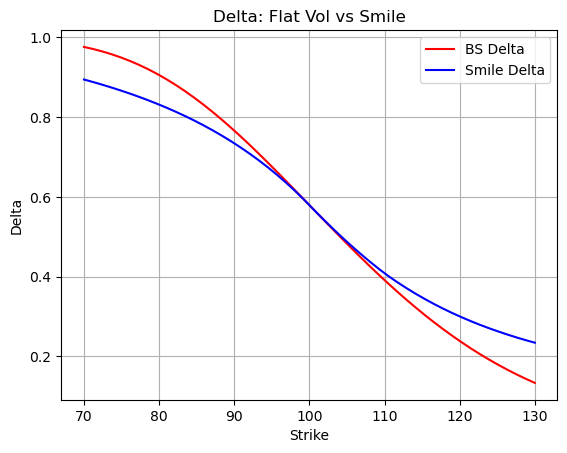

Même à strike égal, le hedge dépend du smile


In [75]:
# b) Comparer le delta d'un call avec une vol constante vs smile de vol

# Formule du delta:
def bs_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return norm.cdf(d1)

# Créons les deux ordonnées:

bs_deltas = [] 
smile_deltas = []

for K in K_grid:
    bs_deltas.append(bs_delta(S0, K, T, r, atm_vol)) # ordonné
    smile_deltas.append(bs_delta(S0, K, T, r, smile_vol(K))) # ordonné


# Graphique:

plt.figure()
plt.plot(K_grid, bs_deltas, color='red', label="BS Delta")
plt.plot(K_grid, smile_deltas, color='blue', label="Smile Delta")
plt.xlabel("Strike")
plt.ylabel("Delta")
plt.title("Delta: Flat Vol vs Smile")
plt.legend()
plt.grid(True)
plt.show()

print('Même à strike égal, le hedge dépend du smile')